In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# reading data-2.csv into pandas df
df = pd.read_csv("data-2.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# description of numeric values of df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [5]:
# description of object data values of df
df.describe(include = 'O').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [6]:
# looking for duplicate records in df
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/2010 11:45       1.25

In [7]:
# dropping duplicate records from df
df.drop_duplicates(inplace=True)
df.shape

(536641, 8)

In [8]:
# print null values of each column
missing_values = pd.concat([df.isnull().sum(), (df.isnull().sum() / len(df) * 100)], axis=1, keys=['Missing Values', '% Missing']).sort_values(by='Missing Values', ascending=False)
print(missing_values)

             Missing Values  % Missing
CustomerID           135037  25.163377
Description            1454   0.270945
InvoiceNo                 0   0.000000
StockCode                 0   0.000000
Quantity                  0   0.000000
InvoiceDate               0   0.000000
UnitPrice                 0   0.000000
Country                   0   0.000000


<Axes: >

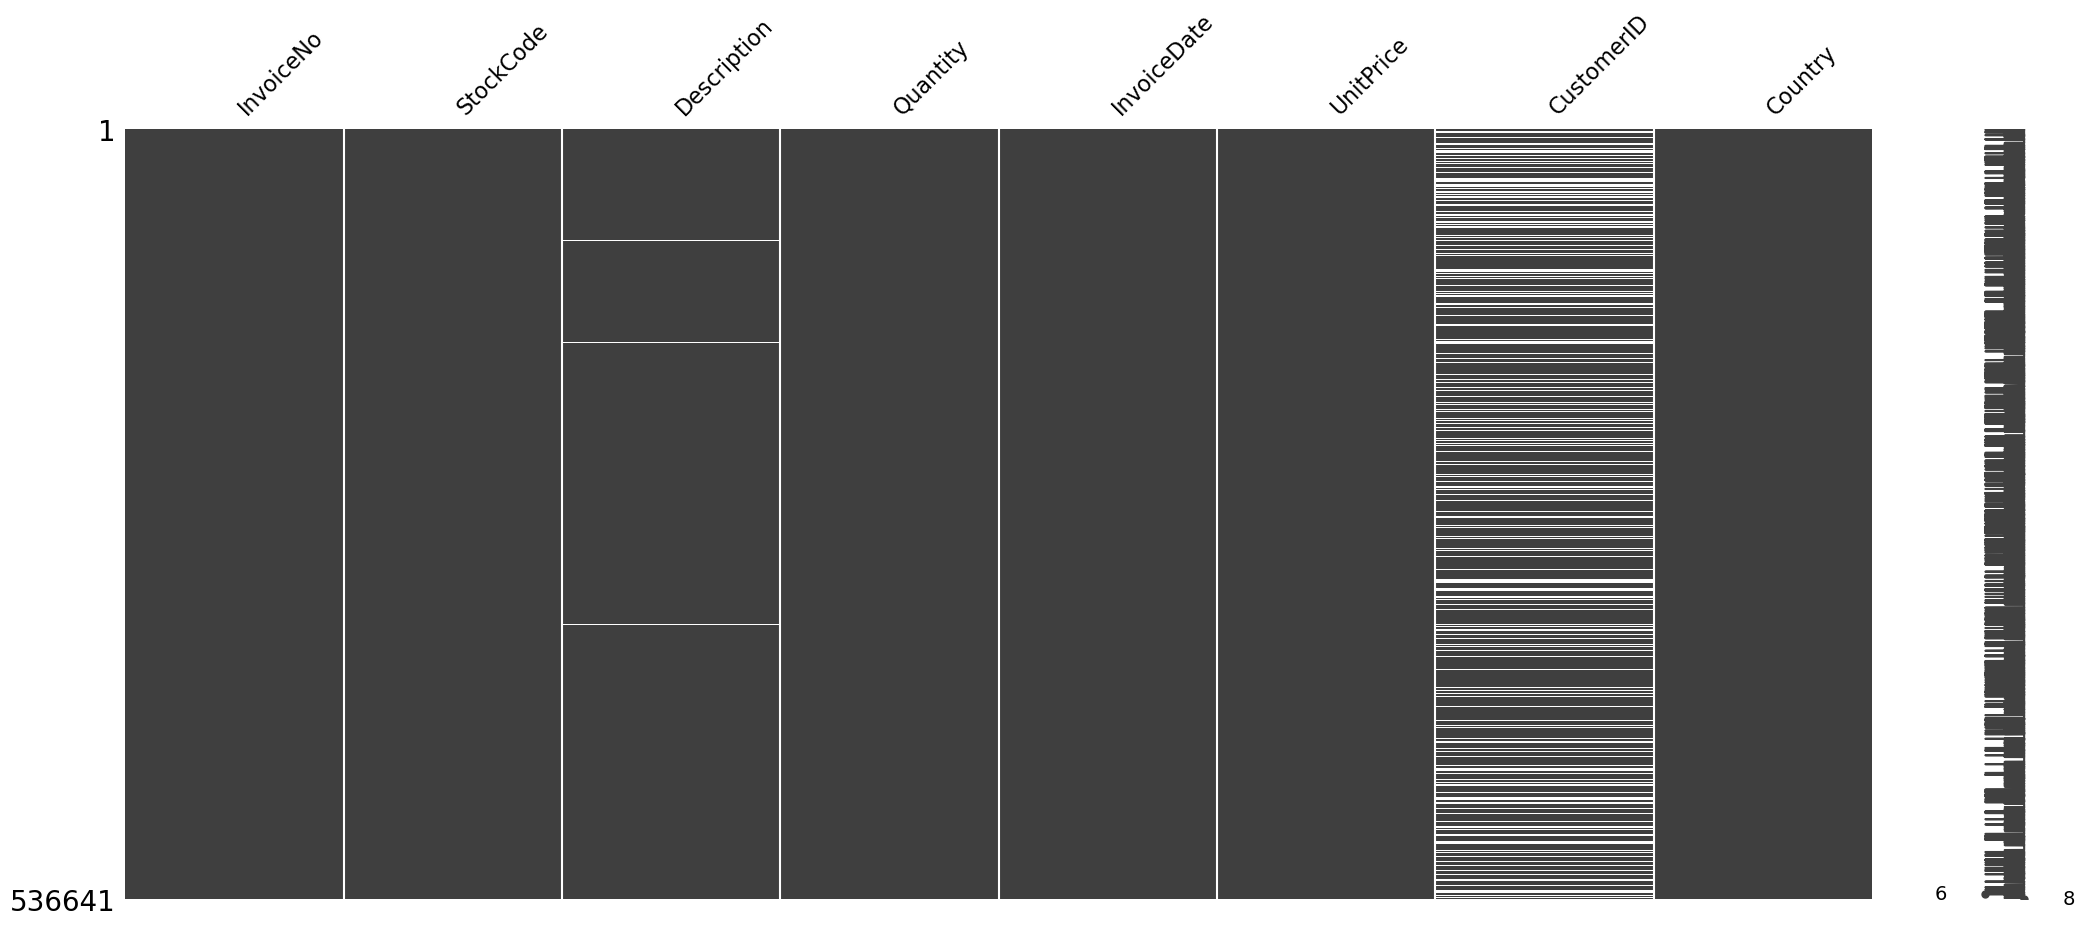

In [9]:
# another way of visualizing missing values
msno.matrix(df)

In [10]:
# droping the rows where sustomer id and discription is missing in df
df.drop(df[df['CustomerID'].isna() | df['Description'].isna()].index, inplace=True)
df.shape

(401604, 8)

In [11]:
# removing all the rows where quantity is negative
#df['Quantity'].unique()
df = df[df['Quantity'] >= 0]
df.shape

(392732, 8)

c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


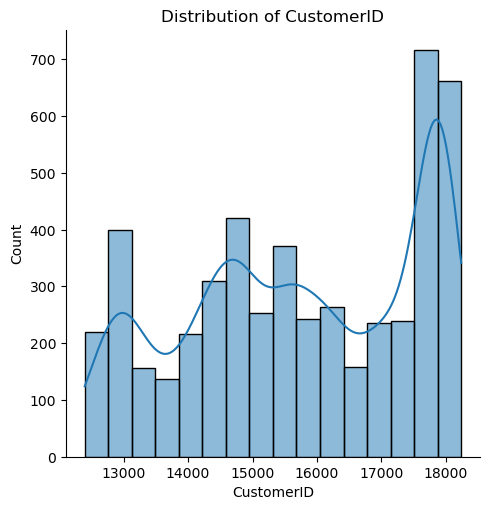

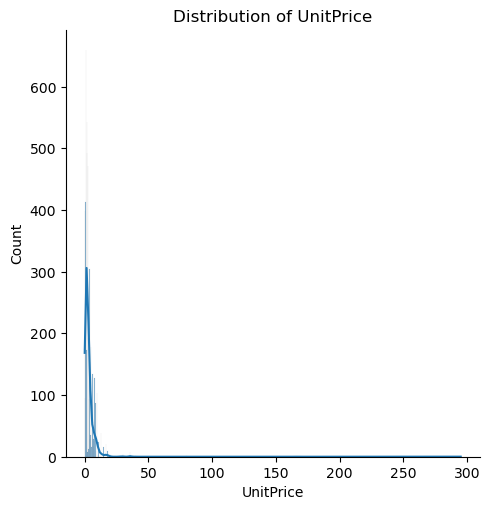

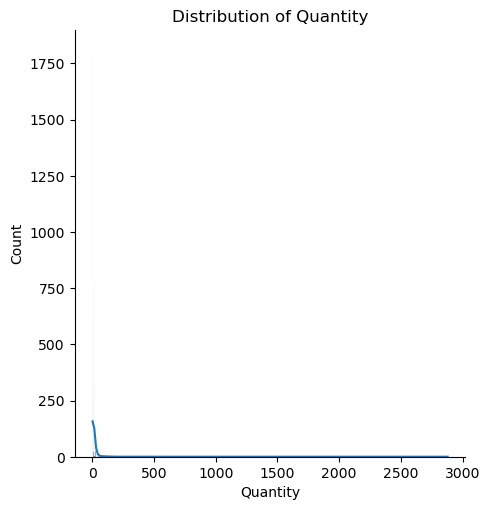

In [12]:
num_cols = ['CustomerID', 'UnitPrice', 'Quantity']

for col in num_cols:
    p = sns.displot(df[:5000], x=col, kde=True)
    plt.title(f"Distribution of {col}")

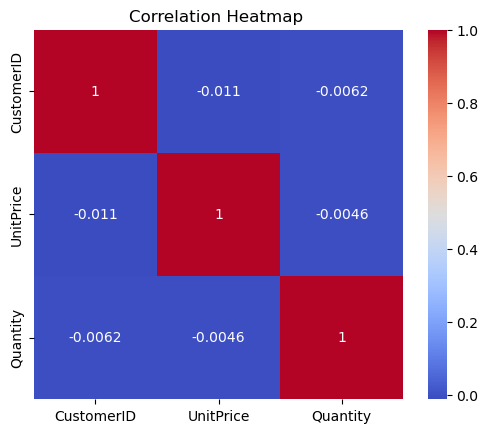

In [13]:
num_df = df[['CustomerID', 'UnitPrice', 'Quantity']]
# heat map to check the correlation between numeric columns
heatmap_check = sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", square=True)
heatmap_check.set_title("Correlation Heatmap ")
plt.show()

In [14]:
# adding Sales column in the df
df['Sales'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [15]:
# changing dtypes of date and customerID columns
df = df.astype({'InvoiceDate':'datetime64[ns]','CustomerID':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
 8   Sales        392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


In [84]:
# creating new columns from InvoiceDate column
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Date'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Year'] = df['InvoiceDate'].dt.year

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Hour,Day,Date,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,Wednesday,1,December,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Wednesday,1,December,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,Wednesday,1,December,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Wednesday,1,December,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Wednesday,1,December,2010


In [114]:
# Calculate total sales for each hour of the day
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index().sort_values(by='Hour')

# Calculate total sales for each day of the month
daily_sales = df.groupby(['Month', 'Day', 'Date', 'Year'])['Sales'].sum().reset_index().sort_values(by=['Year', 'Day'])

# Calculate monthly overall sales
monthly_sales = df.groupby(['Month', 'Year'])['Sales'].sum().reset_index().sort_values(by=['Year', 'Month'])

# Calculate yearly sales
yearly_sales = df.groupby(['Year'])['Sales'].sum().reset_index().sort_values(by='Year')

# Display the results
print("Total Sales for Each Hour of the Day:")
print(hourly_sales)

print("\nTotal Sales for Each Day of the Month:")
print(daily_sales)

print("\nMonthly Overall Sales:")
print(monthly_sales)

print("\nYearly Sales:")
print(yearly_sales)

Total Sales for Each Hour of the Day:
    Hour        Sales
0      6        4.250
1      7    31059.210
2      8   281997.790
3      9   842392.341
4     10  1259267.591
5     11  1101177.600
6     12  1373695.390
7     13  1168724.200
8     14   991992.821
9     15   963559.680
10    16   467380.560
11    17   233811.591
12    18   104744.990
13    19    48568.400
14    20    18832.480

Total Sales for Each Day of the Month:
         Month        Day  Date  Year     Sales
48    December     Friday     3  2010  23876.63
50    December     Friday    10  2010  33488.38
51    December     Friday    17  2010  19966.36
53    December     Monday     6  2010  31009.33
54    December     Monday    13  2010  27578.34
..         ...        ...   ...   ...       ...
278    October  Wednesday    26  2011  34105.36
301  September  Wednesday     7  2011  21967.42
302  September  Wednesday    14  2011  22013.75
303  September  Wednesday    21  2011  38472.10
304  September  Wednesday    28  2011  390

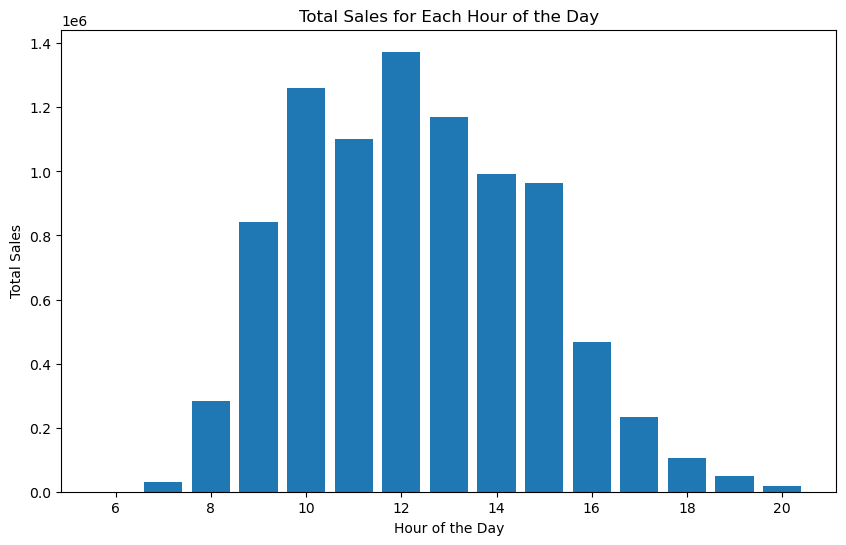

In [105]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(hourly_sales['Hour'], hourly_sales['Sales'])
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Hour of the Day')
plt.show()

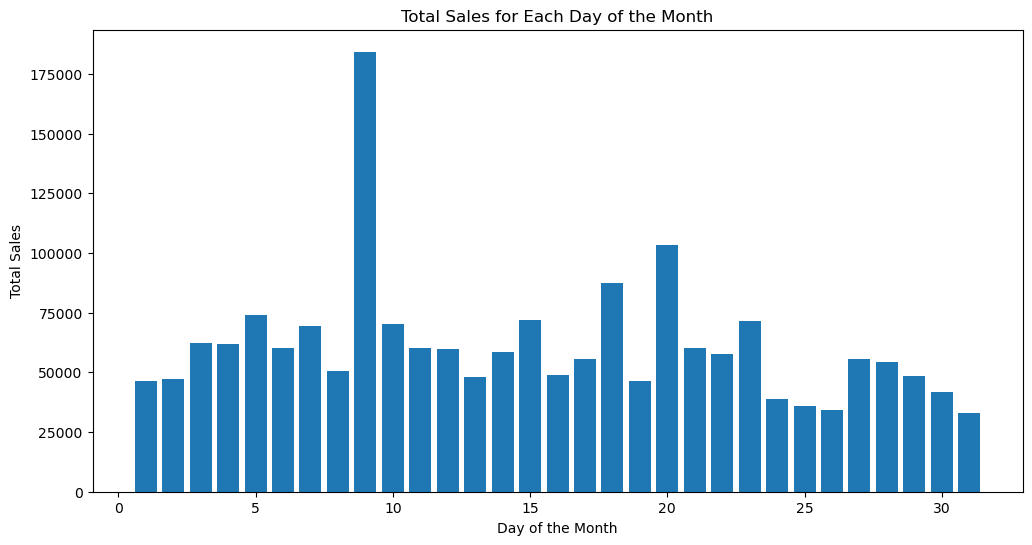

In [147]:
plt.figure(figsize=(12, 6))
plt.bar(daily_sales['Date'], daily_sales['Sales'])
plt.xlabel('Day of the Month')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Day of the Month')
plt.show()

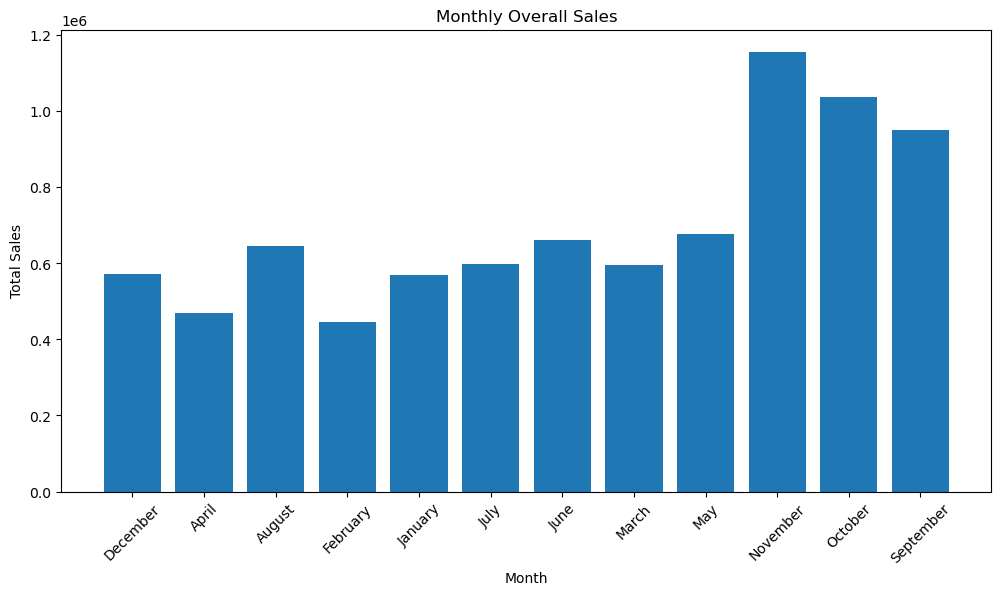

In [110]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['Month'], monthly_sales['Sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Overall Sales')
plt.xticks(rotation=45)
plt.show()

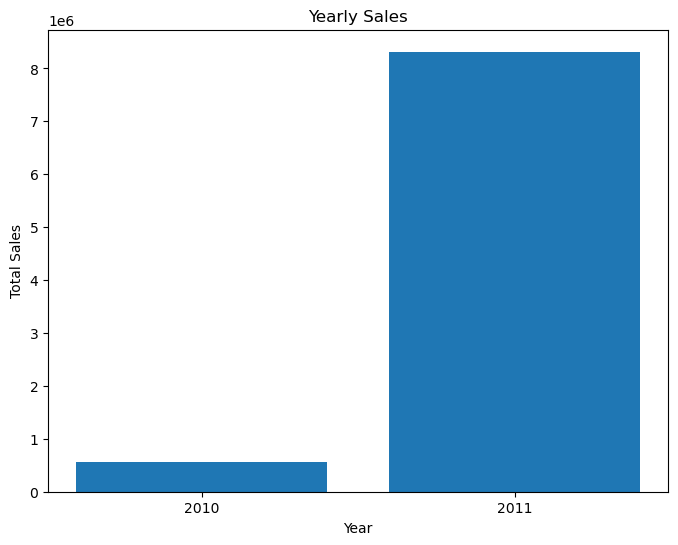

In [112]:
plt.figure(figsize=(8, 6))
plt.bar(yearly_sales['Year'], yearly_sales['Sales'])
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales')
plt.xticks(yearly_sales['Year'])
plt.show()

In [127]:
# top 20 sold item
product_sales = df.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
product_sales.head(20)

,StockCode,Description,Quantity
2602,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2100,23166,MEDIUM CERAMIC TOP STORAGE JAR,77916
3020,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
3444,85099B,JUMBO BAG RED RETROSPOT,46078
3459,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36706
3278,84879,ASSORTED COLOUR BIRD ORNAMENT,35263
432,21212,PACK OF 72 RETROSPOT CAKE CASES,33670
1108,22197,POPCORN HOLDER,30919
2006,23084,RABBIT NIGHT LIGHT,27153
1383,22492,MINI PAINT SET VINTAGE,26076


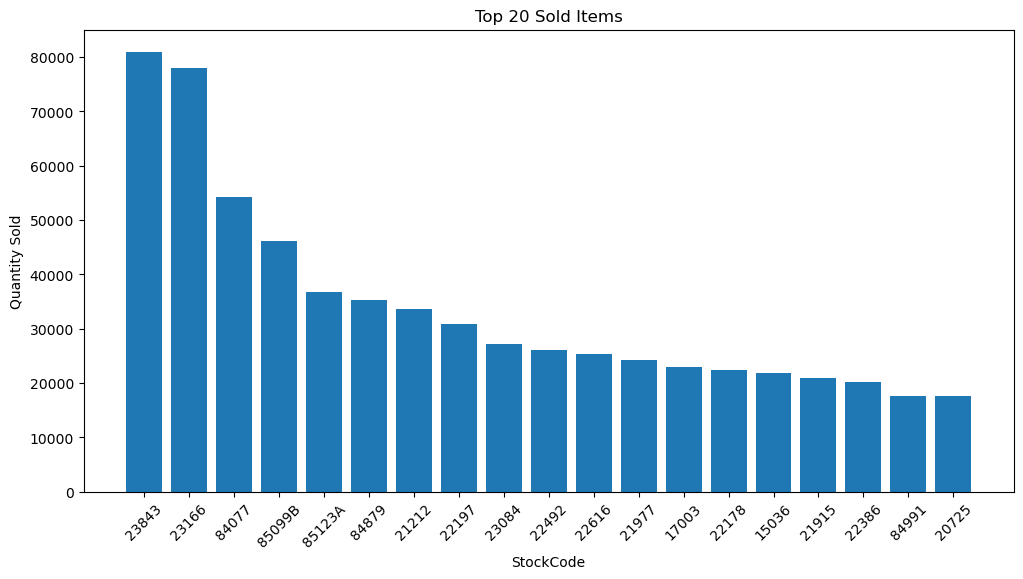

In [131]:
top_20_products = product_sales.head(20)
plt.figure(figsize=(12, 6))
plt.bar(top_20_products['StockCode'], top_20_products['Quantity'])
plt.xlabel('StockCode')
plt.ylabel('Quantity Sold')
plt.title('Top 20 Sold Items')
plt.xticks(rotation=45)
plt.show()

In [137]:
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
sales_by_country

,Country,Sales
35,United Kingdom,7285024.644
23,Netherlands,285446.340
10,EIRE,265262.460
14,Germany,228678.400
13,France,208934.310
0,Australia,138453.810
30,Spain,61558.560
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38367.830


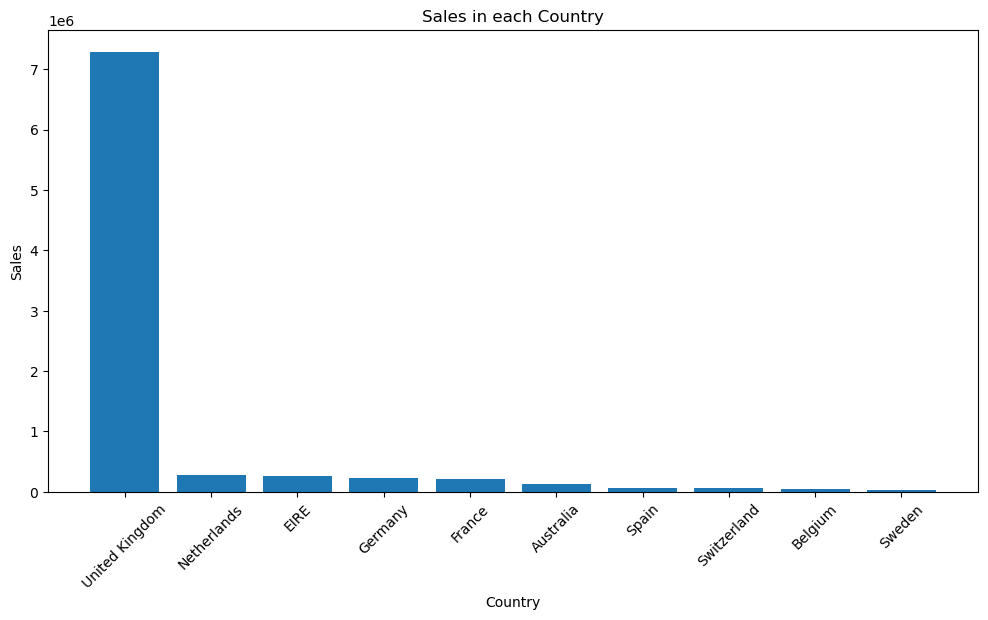

In [146]:
top_10_countries_by_sales = sales_by_country.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries_by_sales['Country'], top_10_countries_by_sales['Sales'])
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Sales in each Country')
plt.xticks(rotation=45)
plt.show()